In [3]:
!pip install statsmodels
!pip install scikit-learn

In [ ]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
#load dataset
new_df=pd.read_csv('C:/classisificatn and regressin/daily-min-temperatures.csv' ,header=0,parse_dates=True)

In [6]:
new_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
new_df['t']=new_df['Temp'].shift(1)

In [8]:
new_df.head()


,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [9]:
new_df['resid']=new_df['Temp']-new_df['t']

In [10]:
new_df.head()

,Date,Temp,t,resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [20]:
new_df.Temp

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 3650, dtype: float64

In [11]:
new_df.resid

0       NaN
1      -2.8
2       0.9
3      -4.2
4       1.2
       ... 
3645   -0.6
3646   -0.4
3647   -0.1
3648    2.2
3649   -2.7
Name: resid, Length: 3650, dtype: float64

In [12]:
new_df.shape[0]-7

3643

In [13]:
new_train,new_test=new_df.resid[1:new_df.shape[0]-7],new_df.resid[new_df.shape[0]-7:]

In [14]:
new_train

1      -2.8
2       0.9
3      -4.2
4       1.2
5       0.0
       ... 
3638    0.7
3639   -2.3
3640    0.1
3641    0.7
3642   -3.9
Name: resid, Length: 3642, dtype: float64

In [15]:
new_test

3643    2.9
3644    1.7
3645   -0.6
3646   -0.4
3647   -0.1
3648    2.2
3649   -2.7
Name: resid, dtype: float64

In [16]:
new_train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: resid, dtype: float64

In [17]:
#train autoregression model
new_model=AutoReg(new_train,lags=29)# 1. Instantiate an autoregression model, with 29 lagged observations.


In [18]:
model_fit=new_model.fit() # 2. Fit the model to the training data.

In [19]:
model_fit.params# 3. Output the learned parameters (coefficients) of the fitted AR model.

const       -0.006415
resid.L1    -0.407139
resid.L2    -0.496194
resid.L3    -0.445747
resid.L4    -0.403706
resid.L5    -0.362528
resid.L6    -0.334810
resid.L7    -0.288468
resid.L8    -0.274281
resid.L9    -0.235333
resid.L10   -0.234799
resid.L11   -0.228532
resid.L12   -0.208608
resid.L13   -0.180324
resid.L14   -0.178425
resid.L15   -0.152265
resid.L16   -0.143617
resid.L17   -0.132501
resid.L18   -0.097075
resid.L19   -0.104927
resid.L20   -0.079371
resid.L21   -0.059348
resid.L22   -0.045921
resid.L23   -0.063197
resid.L24   -0.063441
resid.L25   -0.045061
resid.L26   -0.023578
resid.L27   -0.011882
resid.L28   -0.003789
resid.L29   -0.003422
dtype: float64

In [28]:
new_pred_resid=model_fit.predict(start=len(new_train),end=len(new_train)+len(new_test)).dropna()
# Make predictions for the test data, predicting from the end of the training data
# to one point beyond the length of the test data, and drop any NaN values.

In [29]:
new_pred_resid

3643    1.264192
3644    0.510869
3645   -0.251687
3646   -0.122054
3647    0.077509
3648    0.055600
3649    0.229926
dtype: float64

In [30]:
new_predictions=new_df.t[new_df.shape[0]-7:]+new_pred_resid
new_predictions

3643    11.264192
3644    13.410869
3645    14.348313
3646    13.877946
3647    13.677509
3648    13.555600
3649    15.929926
dtype: float64

In [36]:
rmse=sqrt(mean_squared_error(new_predictions,new_test))
print('test Rmse:%.3F'%rmse)

test Rmse:13.629


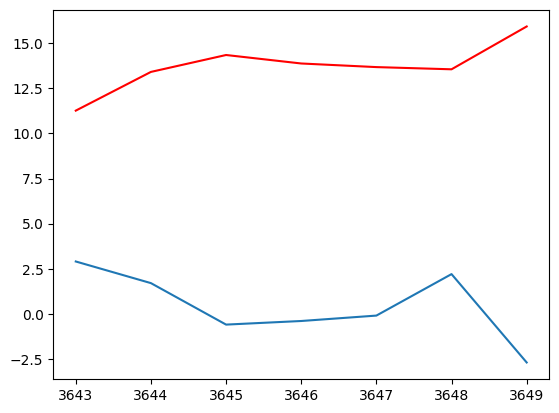

In [37]:
pyplot.plot(new_test)
pyplot.plot (new_predictions,color='red')